# Python and R

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

c:\Users\Juhana\scoop\apps\pyenv\current\pyenv-win\versions\3.11.0rc2\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Import packages

In [3]:
%%R

require('tidyverse')


R[write to console]: Loading required package: tidyverse



-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0      v purrr   1.0.1 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


**Another way to import a package**

Note that sometimes you might see 

```R
library('tidyverse')
```

that also imports a library just the same as `require`

**A note about tidyverse**

The [Tidyverse](https://www.tidyverse.org/packages/) package is actually a bunch of other packages put together. So sometimes, you might see something like

```R
require('ggplot2')
require('readr')
require('dplyr')
require('tidyr')
```

This also achieves the same purpose, but sometimes we just import the pakcages we need instead of the whole tidyverse.




### Read Data


This uses a function in the readr package to read a CSV file. Check out all the other cool things readr can do (like read from an excel file or a google doc)

https://readr.tidyverse.org/

In [4]:
df  = pd.read_csv('AirportComparison2.csv')
df

,Year,Airport,Value
0,2019,HEL,100.0
1,2019,JFK,100.0
2,2020,HEL,23.1
3,2020,JFK,26.6
4,2021,HEL,19.5
5,2021,JFK,49.2
6,2022,HEL,58.9
7,2022,JFK,80.4


In [5]:
%%R

# Read data
df <- read_csv('AirportComparison2.csv')
df

Rows: 8 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): Airport
dbl (2): Year, Value

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 8 x 3
   Year Airport Value
  <dbl> <chr>   <dbl>
1  2019 HEL     100  
2  2019 JFK     100  
3  2020 HEL      23.1
4  2020 JFK      26.6
5  2021 HEL      19.5
6  2021 JFK      49.2
7  2022 HEL      58.9
8  2022 JFK      80.4


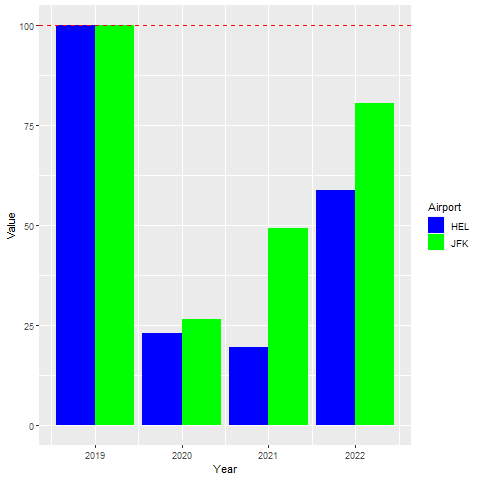

In [6]:
%%R 

ggplot(df) +
    aes(x = Year, y = Value, fill = Airport) +
    geom_bar(stat='identity', position=position_dodge()) +
    ##scale_y_continuous(limits = c(0,100), expand = c(0,0)) +
    geom_hline(yintercept = 100, color = "red", linetype = "dashed")+
    scale_fill_manual(values = c("HEL" = "blue", "JFK" = "green")) 
    #theme(legend.position = "none") +
    #labs(y = "Value (2019 = 100)")

In [7]:
%%R 

df$Year <- as.factor(df$Year)

ggplot(df, aes(x = Year, y = HEL)) +
  geom_bar(aes(fill = "HEL"), stat = "identity") +
  geom_bar(aes(y = JFK), stat = "identity", fill = "JFK") +
  scale_y_continuous(limits = c(0,100), expand = c(0,0)) +
  geom_hline(yintercept = 100, color = "red", linetype = "dashed")+
  scale_fill_manual(values = c("HEL" = "blue", "JFK" = "green")) +
  theme(legend.position = "none") +
  labs(y = "Value (2019 = 100)")

Error in `geom_bar()`:
! Problem while computing aesthetics.
i Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'HEL' not found
Run `rlang::last_error()` to see where the error occurred.


RRuntimeError: Error in geom_bar(aes(fill = "HEL"), stat = "identity") : 
i Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'HEL' not found
